a# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the name and artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [27]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [28]:

filtered_df = df [(df['bpm'] >= 120) & (df['bpm'] <= 130) & (df['mode'] == 'Minor')]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
13,Daylight,David Kushner,1,2023,4,14,3528,98,387570742,80,...,130,D,Minor,51,32,43,83,0,9,3
16,Cupid - Twin Ver.,Fifty Fifty,1,2023,2,24,2942,77,496795686,91,...,120,B,Minor,78,76,59,43,0,34,3
25,SABOR FRESA,Fuerza Regida,1,2023,6,22,250,26,78300654,16,...,130,G,Minor,79,96,86,9,0,9,9
27,MOJABI GHOST,"Tainy, Bad Bunny",2,2023,6,29,859,40,61245289,35,...,122,F#,Minor,81,74,71,14,0,56,4


<Axes: title={'center': 'Acousticness of Spotify Music (2023)'}, xlabel='Acousticness (%)', ylabel='Songs'>

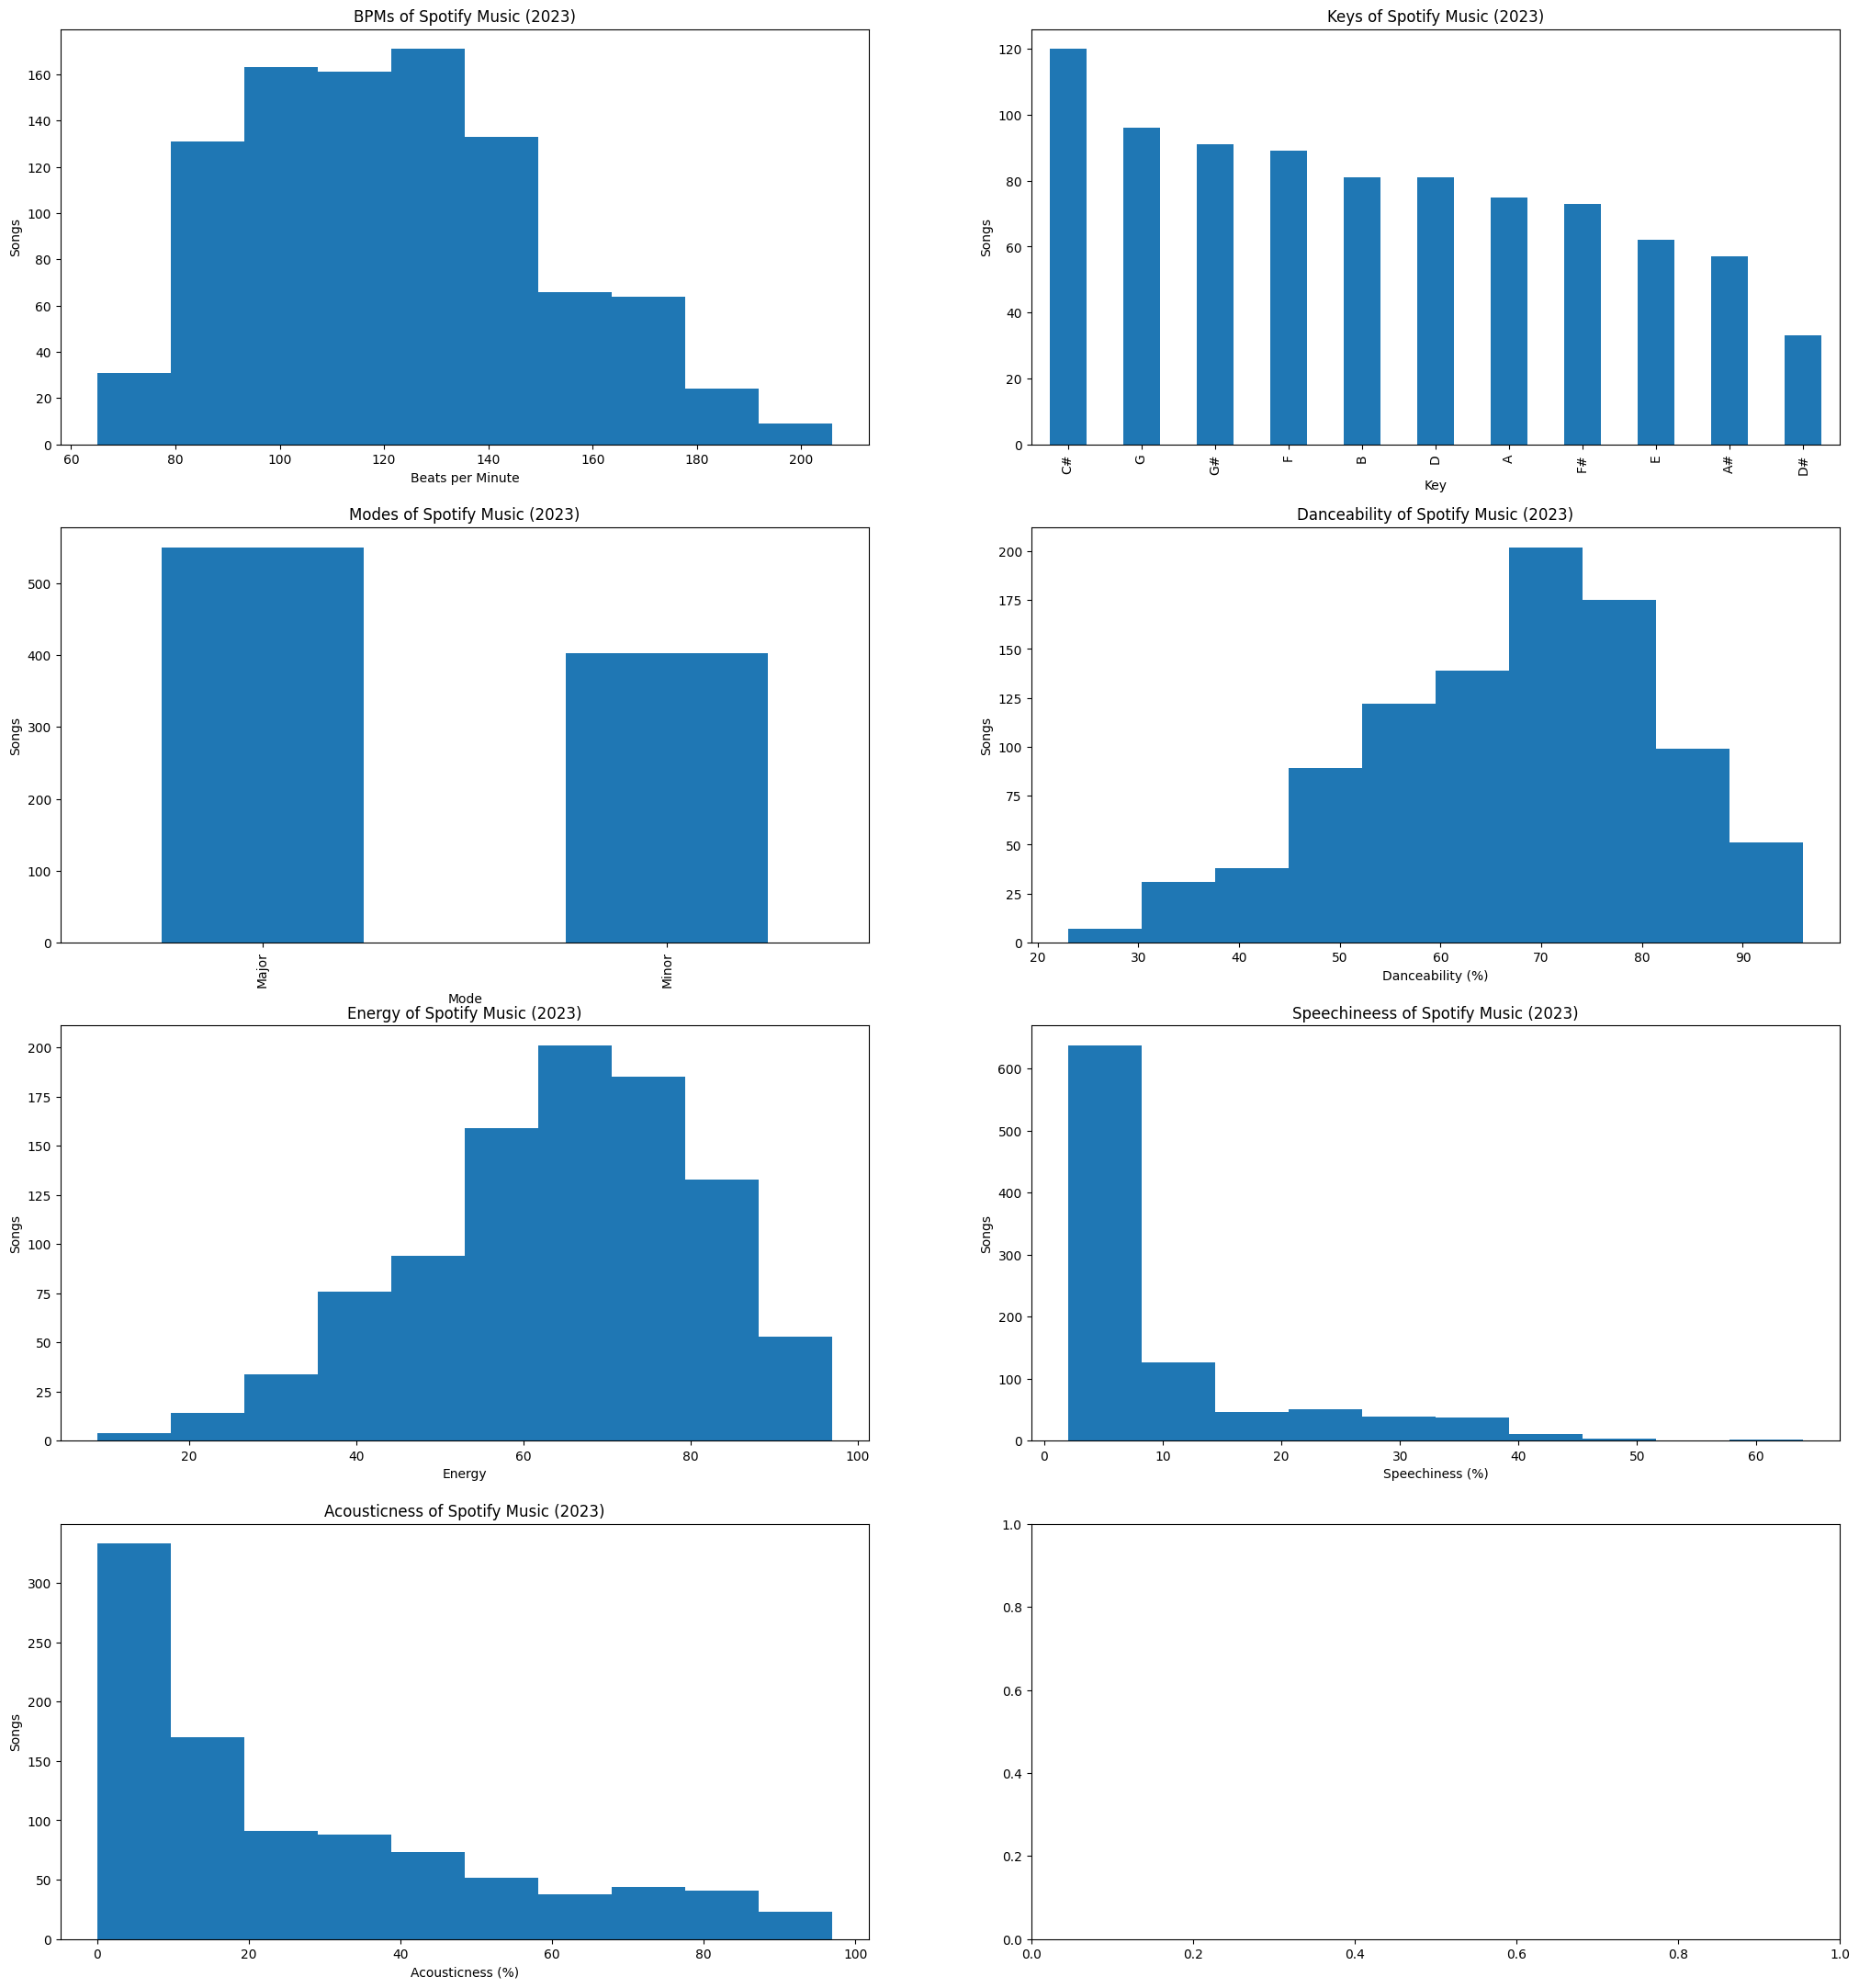

In [29]:
import pandas as pd

# retrieve data
spotify_df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

# This is meant for formatting
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(27)
fig.set_figwidth(25)

spotify_df['bpm'].plot(ax=axes[0, 0], kind='hist', title='BPMs of Spotify Music (2023)', xlabel='Beats per Minute', ylabel='Songs')
spotify_df['key'].value_counts().plot(ax=axes[0, 1], kind='bar', title='Keys of Spotify Music (2023)', xlabel='Key', ylabel='Songs')
spotify_df['mode'].value_counts().plot(ax=axes[1, 0], kind='bar', title="Modes of Spotify Music (2023)", xlabel='Mode', ylabel="Songs")
spotify_df['danceability_%'].plot(ax=axes[1, 1], kind='hist', title="Danceability of Spotify Music (2023)", xlabel='Danceability (%)', ylabel="Songs")
spotify_df['energy_%'].plot(ax=axes[2, 0], kind='hist', title="Energy of Spotify Music (2023)", xlabel="Energy", ylabel="Songs")
spotify_df['speechiness_%'].plot(ax=axes[2, 1], kind='hist', title="Speechineess of Spotify Music (2023)", xlabel='Speechiness (%)', ylabel="Songs")
spotify_df['acousticness_%'].plot(ax=axes[3, 0], kind='hist', title="Acousticness of Spotify Music (2023)", xlabel='Acousticness (%)', ylabel='Songs')


In [30]:
import math

def round_down_to_nearest_multiple(n, m):
	return math.floor(n / m) * m

# qualitatives
average_key = spotify_df['key'].value_counts(sort='asc').keys()[0]
average_mode = spotify_df['mode'].value_counts(sort='asc').keys()[0]

# Each category will have a range of 2 * wiggle, containing the mean
wiggle = 15
rounding_multiple = 10

average_bpm = spotify_df['bpm'].mean()
bpm_rounded_mean = round_down_to_nearest_multiple(average_bpm, rounding_multiple)
max_bpm = bpm_rounded_mean + wiggle
min_bpm = bpm_rounded_mean - wiggle

average_dance = spotify_df['danceability_%'].mean()
dance_rounded_mean = round_down_to_nearest_multiple(average_dance, rounding_multiple)
max_dance = dance_rounded_mean + wiggle
min_dance = dance_rounded_mean - wiggle

average_energy = spotify_df['energy_%'].mean()
energy_rounded_mean = round_down_to_nearest_multiple(average_energy, rounding_multiple)
max_energy = energy_rounded_mean + wiggle
min_energy = energy_rounded_mean - wiggle

average_speech = spotify_df['speechiness_%'].mean()
speech_rounded_mean = round_down_to_nearest_multiple(average_speech, rounding_multiple)
max_speech = speech_rounded_mean + wiggle
min_speech = speech_rounded_mean - wiggle

average_acoustic = spotify_df['acousticness_%'].mean()
acoustic_rounded_mean = round_down_to_nearest_multiple(average_acoustic, rounding_multiple)
max_acoust = acoustic_rounded_mean + wiggle
min_acoust = acoustic_rounded_mean - wiggle

print("Mode: " + average_mode)
print("Key: " + average_key)
print(f'Max BPM: {max_bpm}\tMin BPM: {min_bpm}\tAverage: {average_bpm}')
print(f'Max dance: {max_dance}\tMin dance: {min_dance}\tAverage: {average_dance}')
print(f'Max energy: {max_energy}\tMin energy: {min_energy}\tAverage: {average_energy}')
print(f'Max speech: {max_speech}\tMin speech: {min_speech}\tAverage: {average_speech}')
print(f'Max acoust: {max_acoust}\tMin acoust: {min_acoust}\tAverage: {average_acoustic}')

Mode: Major
Key: C#
Max BPM: 135	Min BPM: 105	Average: 122.54039874081847
Max dance: 75	Min dance: 45	Average: 66.96956977964324
Max energy: 75	Min energy: 45	Average: 64.2791185729276
Max speech: 25	Min speech: -5	Average: 10.131164742917104
Max acoust: 35	Min acoust: 5	Average: 27.057712486883524


In [31]:
my_filtered_df = spotify_df [(spotify_df['bpm'] >= min_bpm) & (spotify_df['bpm'] <= max_bpm)
							 & (spotify_df['mode'] == average_mode) & (spotify_df['key'] == average_key)
							 & (spotify_df['danceability_%'] >= min_dance) & (spotify_df['danceability_%'] <= max_dance)
							 & (spotify_df['energy_%'] >= min_energy) & (spotify_df['energy_%'] <= max_energy)
							 & (spotify_df['speechiness_%'] >= min_speech) & (spotify_df['speechiness_%'] <= max_speech)
							 & (spotify_df['acousticness_%'] >= min_acoust) & (spotify_df['acousticness_%'] <= max_acoust)
							 ]
my_filtered_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,NaN,Major,71,65,68,6,0,3,7
45,Angels Like You,Miley Cyrus,1,2020,11,27,3372,19,570515054,65,...,122,F,Major,67,49,64,10,0,10,3
187,Circles,Post Malone,1,2019,8,30,19664,16,2132335812,391,...,120,NaN,Major,70,59,75,24,0,9,4
191,You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve,Taylor Swift,1,2021,4,9,2619,12,350381515,47,...,130,F#,Major,63,49,73,5,0,9,3
195,Have You Ever Seen The Rain?,Creedence Clearwater Revival,1,1968,7,1,15890,14,1145727611,71,...,116,NaN,Major,74,76,70,7,0,13,3
217,La Jumpa,"Arcangel, Bad Bunny",2,2022,11,30,3794,34,538115192,47,...,123,G#,Major,71,58,70,30,0,32,19
292,Call Out My Name,The Weeknd,1,2018,3,29,11087,6,1449799467,151,...,134,C#,Major,45,17,60,21,0,33,4
308,Late Night Talking,Harry Styles,1,2022,5,20,7461,8,743693613,166,...,115,A#,Major,71,90,73,30,0,11,5
446,Santa Tell Me,Ariana Grande,1,2013,12,13,9408,0,834129063,231,...,133,G,Major,46,53,63,5,0,30,18
500,ýýýabcdefu,Gayle,1,2021,8,13,7215,0,1007612429,170,...,122,E,Major,70,42,54,30,0,37,5


In [32]:
hit = spotify_df[spotify_df['track_name'] == "Sunflower - Spider-Man: Into the Spider-Verse"][0:1]

hit_name = hit['track_name'].array[0]
hit_mode = hit['mode'].array[0]
hit_key = hit['key'].array[0]
hit_bpm = hit['bpm'].array[0]
hit_dance = hit['danceability_%'].array[0]
hit_energy = hit['energy_%'].array[0]
hit_speech = hit['speechiness_%'].array[0]
hit_acoust = hit['acousticness_%'].array[0]

hit_in_range_bpm = hit_bpm >= min_bpm & hit_bpm <= max_bpm
hit_in_range_dance = hit_dance >= min_dance & hit_dance <= max_dance
hit_in_range_energy = hit_energy >= min_energy & hit_energy <= max_energy
hit_in_range_speech = hit_speech >= min_speech & hit_speech <= max_speech
hit_in_range_acoust = hit_acoust >= min_acoust & hit_acoust <= max_acoust

print(f'Hit: {hit_name}')
print(f'Key\tMatch: {hit_key == average_key}\tHit: {hit_key}\t\tAvg: {average_key}')
print(f'Mode\tMatch: {hit_mode == average_mode}\tHit: {hit_mode}\tAvg: {average_mode}')
print(f'BPM\tMatch: {hit_in_range_bpm}\tHit: {hit_bpm}\t\tAvg: {average_bpm}')
print(f'Dance\tMatch: {hit_in_range_dance}\tHit: {hit_dance}\t\tAvg: {average_dance}')
print(f'Energy\tMatch: {hit_in_range_energy}\tHit: {hit_energy}\t\tAvg: {average_energy}')
print(f'Speech\tMatch: {hit_in_range_speech}\tHit: {hit_speech}\t\tAvg: {average_speech}')
print(f'Acoust\tMatch: {hit_in_range_acoust}\tHit: {hit_speech}\t\tAvg: {average_acoustic}')


Hit: Sunflower - Spider-Man: Into the Spider-Verse
Key	Match: False	Hit: D		Avg: C#
Mode	Match: True	Hit: Major	Avg: Major
BPM	Match: True	Hit: 90		Avg: 122.54039874081847
Dance	Match: True	Hit: 76		Avg: 66.96956977964324
Energy	Match: True	Hit: 50		Avg: 64.2791185729276
Speech	Match: True	Hit: 5		Avg: 10.131164742917104
Acoust	Match: True	Hit: 5		Avg: 27.057712486883524


# Conclusions
Much to my surprise, our (blindly) chosen hit song actually nearly *completely* fell within the parameters for our perfectly engineered song. In our dataset, only 3 songs fell within our parameters. The song Sunflower, by Post Malone and Swae Lee, just *barely* eluded our parameters because it utilized the D key, when the most commonly used key was C#.
We should note that Need to Know by Doja Cat with a whopping ***billion*** views also matched our criteria.

Loosening up our criteria a little bit to include any key, we find other songs in the billion streams, including "Call Out My Name" by the Weeknd, "Flowers" by Miley Cyrus, "Circles" by Post Malone, "Have You Ever Seen the Rain" by Creedence Clearwater Revival (a personal favorite), and "Santa Tell Me" by Ariana Grande.

It turns out that the most average song on the platform may perform pretty well.
